In [1]:
classnum = ['airplane', 'ashcan', 'bag', 'basket', 'bathtub', 'bed', 'bench', 'birdhouse', 'bookshelf', 'bottle', 'bowl', 'bus', 'cabinet', 'camera', 'can', 'cap', 'car', 'cellular', 'chair', 'clock', 'dishwasher', 'display', 'earphone', 'faucet', 'file', 'guitar', 'helmet', 'jar', 'keyboard', 'knife', 'lamp', 'laptop', 'loudspeaker', 'mailbox', 'microphone', 'microwave', 'motorcycle', 'mug', 'piano', 'pillow', 'pistol', 'pot', 'printer', 'remote', 'rifle', 'rocket', 'skateboard', 'sofa', 'stove', 'table', 'telephone', 'tower', 'train', 'vessel', 'washer']

In [140]:
stats = np.load('../../../what3Ddataset/stats.npz')
testset = stats['test'][0]
infile = 'Oracle_NN/Train.log'
class_loss = []
with open(infile) as f:
    f = f.readlines()
    for line in f:
        if 'avg loss' in line:
            class_loss.append(float(line[line.find('s:')+2:-1]))
testset = [testset[cla] for cla in classnum[:len(class_loss)]]
#print("class num list", testset)
#print("class loss list", class_loss)
sumloss = 0
for idx in range(len(class_loss)):
    sumloss += class_loss[idx] * testset[idx]

print(sumloss/sum(testset))

0.07198274994856946


In [46]:
stats = np.load('../../../what3Ddataset/stats.npz')
testnum = stats['test'][0]
Oracle_NN = np.load('Oracle_NN/class_loss.npy')
Oracle_NN = Oracle_NN[()]

weight_loss = 0
for cl in Oracle_NN:
    weight_loss += Oracle_NN[cl] * testnum[cl]
print('weighted class loss:',weight_loss/sum(testnum.values()))

weighted class loss: 0.07192724086553459


instance avg loss: 0.07192724127905788


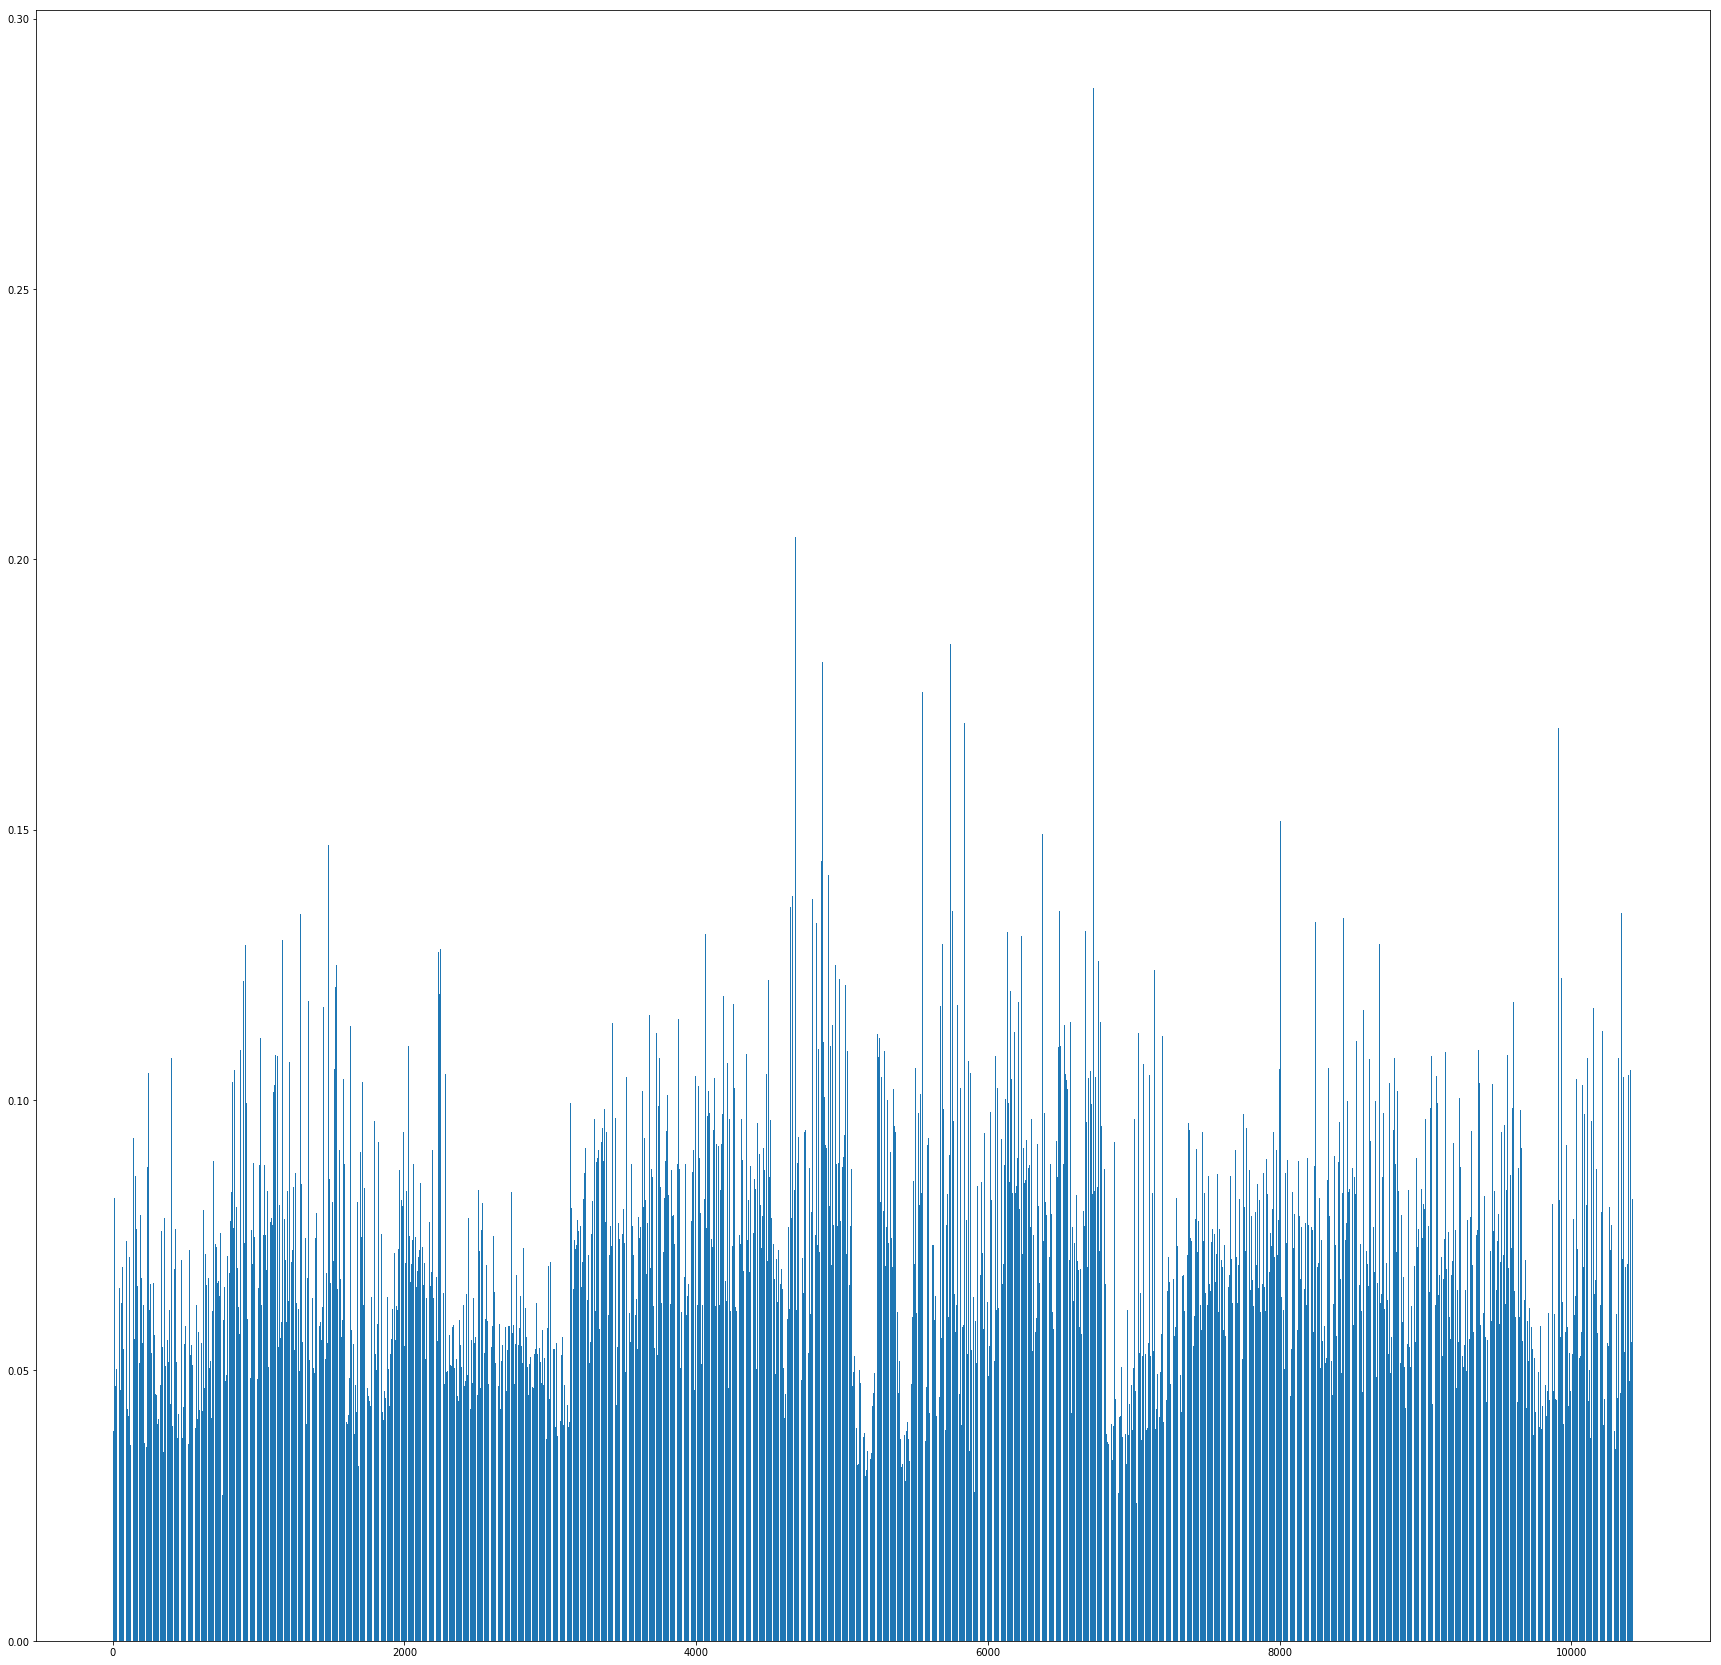

In [47]:
loss = np.load('Oracle_NN_2/test_minloss.npz')
plt.figure(figsize =(30,30))
plt.bar(loss['iter_loss'][:,0],loss['iter_loss'][:,1])
print('instance avg loss:', np.mean(loss['iter_loss'][:,1]))